# Merging of Metabolic Network Graphs

The purpose of this notebook is to identify criteria for classifying GFMs (without 16S sequence data) as members of a particular tribe, based on shared amino acid identity (ANI). The metabolic models of these genomes will then be merged to give a model which is better representative of a particular tribe. Our reverse ecology analysis will then be performed on these merged models.

## Merging Genomes Based on ANI
Pairwise ANI were computed by Sarah using the method in Goris et al IJSEM 2007. This notebook examines pairwise ANI values between all members within a tribe to identify a minimum ANI criterion for adding a new genome to the tribe. Then I identify genomes which are candidates for inclusion within a tribe (based on phylogeny) and determine whether or not they can be included within a tribe (based on ANI).

#### References
1. Konstantinidis, K. T., & Tiedje, J. M. (2005). Genomic insights that advance the species definition for prokaryotes. Proceedings of the National Academy of Sciences, 102(7), 2567–2572.
2. Goris, J., Konstantinidis, K. T., Klappenbach, J. A., Coenye, T., Vandamme, P., & Tiedje, J. M. (2007). DNA-DNA hybridization values and their relationship to whole-genome sequence similarities. International Journal of Systematic and Evolutionary Microbiology, 57(1), 81–91.

#### TO DO
1. Extend this analysis to examine coverage as well as ANI.

The first chunk of code identifies imports the Python packages necessary for this analysis.

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import pairwiseANIFunctions as ANI

# Define local folder structure for data input and processing.
externalDataDir = 'ExternalData'

### Using SAGs to Compute Cutoffs

I want to identify an ANI cutoff, such that any two genomes belonging to the same tribe have an ANI greater than this value. The function below computes the minimum and maximum pairwise ANI for all genomes belonging to the same tribe.

In [2]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir, pairwiseANI, taxonClass, tribes)

,Samples,Num Samples,Max ANI,Min ANI
Iluma-A2,[AAA027E14],1,99.97,99.97
Iluma-B1,[AAA027L17],1,99.54,99.54
Luna1-A2,[AAA028P02],1,100,100
acI-A1,"[AAA027M14, AAA278O22]",2,100,79.56
acI-A5,"[AAA028G02, AAA044O16]",2,99.95,86.69
acI-A6,"[AAA028E20, AAA028I14]",2,100,81.17
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,100,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,100,79.06
acI-B4,[AAA044D11],1,100,100


This suggests a cutoff of 79% ANI as a reasonable cutoff for merging an additional genome into the tribe.

So, let's take a look at our phylogenetic tree and identify opportunities to merge genomes. A new genome which gets added to the tribe must:
* have ANI above the tribe-specific cutoff
* maintain the tribe as a monophylogenetic group

![Phylogenetic tree](imageFiles/2015-07-03 Phylogenetic Tree.png)

First we will define a function to compute the minimum pairwise ANI within a particular tribe. The function will also compute the minimum pairwise ANI with the new genome added. If this value is lower than the cutoff defined above, then the additional genome is too divergent to be added to the tribe.

### Cases Involving a Tribe with Multiple SAGs
One candidate for addition to a tribe is MEint2297 to tribe acI-A1. Let's check it out:

In [3]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')
ANI.addGenomeToTribe(pairwiseANI, taxonClass, tribes, 'acI-A1', 'MEintmetabat2297')

                  AAA027M14  AAA278O22  MEintmetabat2297
AAA027M14            100.00      79.56             75.47
AAA278O22             79.71     100.00             75.62
MEintmetabat2297      75.66      75.52             99.44
79.56

The minimum ANI within the tribe acI-A1 is: 79.56

When genome MEintmetabat2297 is added, the min pairwise ANI becomes: 75.47


The GFM has a smaller pairwise ANI than the cutoff (79.06), so it will not get added to the acI-A1 tribe.

### Cases Involving a Tribe with a Single SAG

For some tribes we only have a single SAG, such as AAA044-D11 for tribe acI-B4. This SAG forms a monophyletic group with the GFM MEint4252. Can we assign them to the same tribe?

The function below takes two inputs:
* existingGenomes - one or more genomes defined as belonging to the same tribe
* newGenome - the genome being considered for addition to a cluster containing existingGenomes
and computes the smallest pairwise ANI among all samples belonging to the same tribe (e.g., the 'cutoff' described above). The function will also compute the minimum pairwise ANI with the new genome added. If this value is lower than the first, then the additional genome is too divergent to be added to the tribe.

Let's check out AAA044-D11 and MEint4252:

In [4]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomy.csv')

ANI.compareSamples(externalDataDir, pairwiseANI, taxonClass, tribes, ['AAA044D11'], ['MEintmetabat4252'])


When genome ['MEintmetabat4252'] is added, the min pairwise ANI among all samples: 84.36


So we can consider MEint4252 to belong to the same tribe as AAA044-D11. The phylogenetic tree suggests that TBepi.4208 is also a candidate for this tribe:

In [5]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.compareSamples(externalDataDir, pairwiseANI, taxonClass, tribes, ['AAA044D11', 'MEintmetabat4252'], ['TBepimetabat4208'])


When genome ['TBepimetabat4208'] is added, the min pairwise ANI among all samples: 76.32


So that genome should not get added to the tribe.

There are other examples, but I will hold off on further analysis until I incorporate coverage into my analysis.

### Constructing Tribes de novo

The above approach could also be used to cluster GFMs into tribes in the absence of SAGs. This would enable us to declare multiple GFMs as belonging to the same tribe, but without knowing what specific tribe it might be (e.g., within the acIV and acV lineages which currently lack GFMs.) 

For example, the acV lineage contains a monophyletic group of TBepi2973 and TBhypo3180. Let's compare these two genomes:

In [6]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomy.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBepimetabat2973'], ['TBhypometabat3180'])


When genome ['TBhypometabat3180'] is added, the min pairwise ANI among all samples: 99.77


The sample TBhypo9906 is also monophyletic with the two samples above. Should we add it?

In [7]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomy.csv')
ANI.compareSamples(externalDataDir,pairwiseANI, taxonClass, tribes, ['TBepimetabat2973','TBhypometabat3180'], ['TBhypometabat9906'])


When genome ['TBhypometabat9906'] is added, the min pairwise ANI among all samples: 71.19


So that genome belongs to a separate tribe. (Remember, the cutoff is 79.06% ANI)

### Conclusions

Use of ANI seems a promising way to classify genomes into tribes. To be continued...

### How Many SAGs Do We Need?

In order to have a robust estimate of the ANI which defines a tribe (or clade, or lineage), we need to be confident we have enough samples (e.g., so that acculumating more SAGs doesn't change the ANI cutoff). Let's see how many samples we have from each tribe:

In [8]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)

,Samples,Num Samples,Max ANI,Min ANI
Iluma-A2,[AAA027E14],1,99.97,99.97
Iluma-B1,[AAA027L17],1,99.54,99.54
Luna1-A2,[AAA028P02],1,100,100
acI-A1,"[AAA027M14, AAA278O22]",2,100,79.56
acI-A5,"[AAA028G02, AAA044O16]",2,99.95,86.69
acI-A6,"[AAA028E20, AAA028I14]",2,100,81.17
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,100,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,100,79.06
acI-B4,[AAA044D11],1,100,100


We have the most SAGs from tribe acI-B1, and the pairwise ANI between samples ranges from 79 to 99%. Let's suppose these six SAGs are representative of the entire acI-B1 sequence space. Suppose we only sequenced two SAGs. The function below will compute all possible pairs and their max and min ANI:

In [9]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'acI-B1', 2)

                       Max ANI Min ANI
(AAA023D18, AAA027J17)     100   79.88
(AAA023D18, AAA027L06)     100   80.01
(AAA023D18, AAA028A23)     100   80.01
(AAA023D18, AAA278I18)     100   80.94
(AAA023D18, AB141P03)      100   79.45
(AAA027J17, AAA027L06)     100   81.76
(AAA027J17, AAA028A23)     100   81.74
(AAA027J17, AAA278I18)     100    80.1
(AAA027J17, AB141P03)      100   80.68
(AAA027L06, AAA028A23)     100   99.08
(AAA027L06, AAA278I18)     100   79.44
(AAA027L06, AB141P03)      100   96.44
(AAA028A23, AAA278I18)     100   79.32
(AAA028A23, AB141P03)      100   96.36
(AAA278I18, AB141P03)      100   79.06
Sampling tribe acI-B1 with sample size 2.
The worst-case pairwise minimum ANI is: 99.08


If we were especially unlucky, we would have sequenced SAGs L06 and A23, and we would have predicted a tribe-specific cutoff of 99.08 ANI. What if we instead sampled three SAGs:

In [10]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'acI-B1', 3)

                                  Max ANI Min ANI
(AAA023D18, AAA027J17, AAA027L06)     100   79.88
(AAA023D18, AAA027J17, AAA028A23)     100   79.88
(AAA023D18, AAA027J17, AAA278I18)     100   79.88
(AAA023D18, AAA027J17, AB141P03)      100   79.45
(AAA023D18, AAA027L06, AAA028A23)     100   80.01
(AAA023D18, AAA027L06, AAA278I18)     100   79.44
(AAA023D18, AAA027L06, AB141P03)      100   79.45
(AAA023D18, AAA028A23, AAA278I18)     100   79.32
(AAA023D18, AAA028A23, AB141P03)      100   79.45
(AAA023D18, AAA278I18, AB141P03)      100   79.06
(AAA027J17, AAA027L06, AAA028A23)     100   81.74
(AAA027J17, AAA027L06, AAA278I18)     100   79.44
(AAA027J17, AAA027L06, AB141P03)      100   80.68
(AAA027J17, AAA028A23, AAA278I18)     100   79.32
(AAA027J17, AAA028A23, AB141P03)      100   80.68
(AAA027J17, AAA278I18, AB141P03)      100   79.06
(AAA027L06, AAA028A23, AAA278I18)     100   79.32
(AAA027L06, AAA028A23, AB141P03)      100   96.36
(AAA027L06, AAA278I18, AB141P03)      100   79.06


If we were again unlucky, we would have sequenced SAGs L06, A23, and P03, and we would have predicted a tribe-specific cutoff of 96.36 ANI. Let's define a new function which repeats this calculation for all possible sample sizes (up to 6 for tribe acI-B1).

Sampling tribe acI-B1 with sample size 2.
The worst-case pairwise minimum ANI is: 99.08
Sampling tribe acI-B1 with sample size 3.
The worst-case pairwise minimum ANI is: 96.36
Sampling tribe acI-B1 with sample size 4.
The worst-case pairwise minimum ANI is: 80.68
Sampling tribe acI-B1 with sample size 5.
The worst-case pairwise minimum ANI is: 79.45
Sampling tribe acI-B1 with sample size 6.
The worst-case pairwise minimum ANI is: 79.06


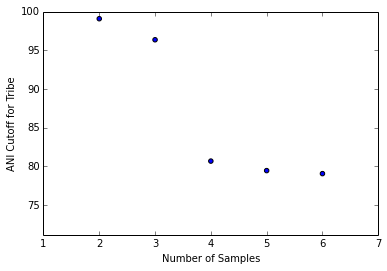

In [11]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'acI-B1')

These six samples appear to be enough. What about tribe acI-A7, for which we have 4 samples?

Sampling tribe acI-A7 with sample size 2.
The worst-case pairwise minimum ANI is: 96.2
Sampling tribe acI-A7 with sample size 3.
The worst-case pairwise minimum ANI is: 88.21
Sampling tribe acI-A7 with sample size 4.
The worst-case pairwise minimum ANI is: 87.13


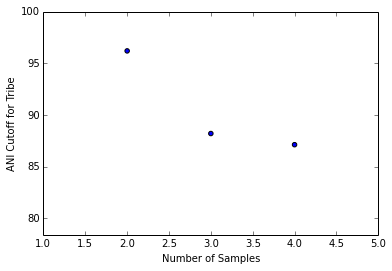

In [12]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes)
ANI.allWorstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'acI-A7')

Having one more SAG would give us more confidence in the ANI cutoff.

## Reverse Ecology Analysis on Merged Genomes

When the above analysis is complete, we will have sets of genomes whose metabolic network models can be merged to give a more comprehensive model for each tribe. For now, we will only merge graphs for those SAGs belonging to the same tribe.

First import the necessary preliminaries and custom functions.

In [13]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import graphFunctions as gf
import metadataFunctions as mf
import sbmlFunctions as sf
import seedFunctions as ef

# Define local folder structure for data input and processing.
rawModelDir = 'ProcessedModelFiles'
processedDataDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'
externalDataDir = 'ExternalData'

First read in a file listing {lineage, clade, tribe} for each sample and aggregate all genomes belonging to the same tribe. The current input file taxonomySAGs.csv contains classifications for the SAGs only.

In [14]:
tribeSampleDict =  mf.importTaxonomy('../ExternalData/taxonomySAGs.csv')
tribeSampleDict

Importing taxonomy


{'Iluma-A2': ['AAA027E14'],
 'Iluma-B1': ['AAA027L17'],
 'Luna1-A2': ['AAA028P02'],
 'acI-A1': ['AAA027M14', 'AAA278O22'],
 'acI-A5': ['AAA028G02', 'AAA044O16'],
 'acI-A6': ['AAA028E20', 'AAA028I14'],
 'acI-A7': ['AAA023J06', 'AAA024D14', 'AAA041L13', 'AAA044N04'],
 'acI-B1': ['AAA023D18',
  'AAA027J17',
  'AAA027L06',
  'AAA028A23',
  'AAA278I18',
  'AB141P03'],
 'acI-B4': ['AAA044D11']}

Then, merge the metabolic network graphs for the samples from each tribe. Each sample is converted to a graph object and merged with the previous graph. The final graph is written to file.

In [15]:
gf.createTribalGraph(tribeSampleDict, processedDataDir, rawModelDir)

Merging genomes from individual tribes


The remaining code operates similarly to the RE analysis using all individual genomes. The metabolic network graphs corresponding to each tribe are imported:

In [16]:
dirList = mf.getDirList('../'+processedDataDir)
numSubDir = len(dirList)

Compute summary statistics on the size of each tribe's network graph.

In [17]:
graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, processedDataDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

IOError: [Errno 2] No such file or directory: '../DataSummaries/MergedData/GraphStatistics.txt'

Convert each network graph to its largest component.

In [ ]:
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)

Compute seed sets and plot summary statistics.

In [ ]:
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
gf.plotSeedStatsForTribes(seedSetList, reducedGraphStatArray)

Aggregate the seed compounds for all tribes into a single matrix and write the results to file.

In [ ]:
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

Cluster the seed profiles and create the dendrogram:

In [ ]:
ef.clusterSeedSets(seedMatrixDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv')

Genomes in the above clustergram are colored as follows:

acI-A: green  
acI-B: blue  
acIV-A: red  
acIV-B: maroon  
acSTL-A: black  
acTH1-A: grey  
Luna1-A:  cyan  

And here is just the dendrogram for genomes:

In [ ]:
ef.clusterOnly(seedMatrixDF, dirList, externalDataDir, 'tribalColors.csv')

Compute the competidion index

In [ ]:
metabCompeteDF = ef.computeMetabCompete(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabCompeteDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicCompetition.png')

Compute the cooperation index:

In [ ]:
metabComplementDF = ef.computeMetabComplement(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabComplementDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicComplementarity.png')

We are currently analyzing the seed profiles to look for shared features of the actinobacterial lineage, and unique features of each tribe. 


** TO DO **
1. Provide an illustration of what the "merging" process looks like for metabolic network graphs.